# Chapter 4. 분류

## 1. 분류(classification)의 개요

## 2. 결정 트리
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree) 기반의 분류 규칙을 만드는 것입니다.
- 규칙 노드(Decision Node): 규칙 조건
- 리프 노드(Leaf Node): 결정된 클래스 값
- 새로운 규칙 조건마다 서브 트리(Sub Tree)가 생성

많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어집니다. 즉, 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높습니다.

균일한 데이터 세트란 데이터 세트 안에 한 클래스가 많은 것을 말합니다. 이러한 데이터 세트의 균일도는 데이터를 구분하는 데 필요한 정보의 양에 영향을 미칩니다.

결정 노드는 정보 **균일도가 높은 데이터 세트를 먼저 선택**할 수 있도록 규칙 조건을 만듭니다. 즉, 정보 균일도가 데이터 세트로 쪼개질 수 있도록 조건을 찾아 서브 데이터 세트를 만들고, 다시 이 서브 데이터 세트에서 균일도가 높은 자식 데이터 세트 쪼개는 방식으로 자식 트리로 내려가면서 반복하는 방식으로 데이터 값을 예측합니다.

정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있습니다.
- 정보 이득: 엔트로피는 주어진 데이터 집합의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮습니. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 **1 - 엔트로피 지수** 입니다. 정보 이득이 높은 속성을 기준으로 분할합니다.
- 지니 계수: 0이 가장 평등하고 1로 갈수록 불평등합니다. 지니 계수가 낮을 수록 데이터의 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할합니다.

**정보 이득이 높거나, 지니 계수가 낮은 조건**을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정합니다.

- 데이터가 균일하면 분류할 필요가 없다고 처음에 생각했는데, 피처가 여러 개로 되어있으면 균일한 데이터를 먼저 선택하여 분류하는 것이 더 쉽습니다. 예를 들어서, '색깔'피처 빨, 주, 노가 있고 '모양'피처 동그라미, 네모, 세모가 있는 경우, '색깔'피처가 빨간색으로 균일한 데이터인 경우, 더 쉽게 분류를 진행할 수 있을 것 입니다.

- 장점: 균일도를 기반으로 하고 있어서 알고리즘이 쉽고 직관적입니다. 시각화도 가능합니다. 균일도만 신경쓰면 되므로 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요가 없습니다.
- 단점: 과적합으로 정확도가 떨어집니다. -> 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 도움이 됩니다.


DecisionTreeClassifier(분류), DecisionTreeRegressor(회귀)의 파라미터
- min_samples_split(default: 2): 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가, 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf: leaf node가 되기 위한 최소한의 샘플 수, 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우에는 작게 설정 필요
- max_features(default: None): 최적의 분할을 위해 고려할 최대 피처의 개수
    - int형: 대상 피처의 개수
    - float형: 전체 피처 중 대상 피처의 퍼센트
    - 'sqrt': 전체 피처 중 sqrt, 즉 $\sqrt{전체 피처 개수}$ 만큼 선정
    - 'auto': sqrt와 동일
    - 'log': 전체 피처 중 $log_{2}(전체 피처 개수)$로 선정
    - 'None': 전체 피처선정
- max_depth(default: None): 트리의 최대 깊이를 규정, None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_sample_split보다 작아질 때까지 계속 깊이를 증가시킴, 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes: Leaf Node의 최대 개수

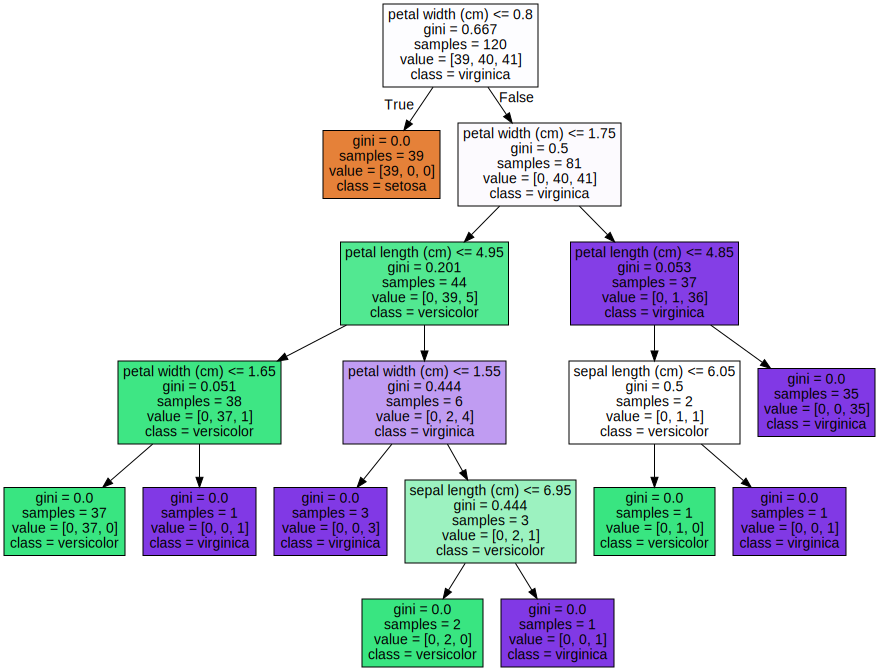

In [2]:
# Graphviz 패키지 사용

# export_graphviz()는 함수 인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트를 
# 입력하면 학습된 결정 트리 규칙을 실제 트리 형태로 시각화해 보여줍니다.

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

dt_clf = DecisionTreeClassifier()

iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2)

dt_clf.fit(x_train, y_train)

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
    feature_names=iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

각 규칙에 따라 트리의 브랜치(branch) 노드와 말단 리프(leaf) 노드가 어떻게 구성됐는지 한눈에 알 수 있게 시각화돼 있습니다.

더 이상 자식 노드가 없는 노드는 리프 노드입니다. 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드입니다.

자식 노드가 있는 노드는 브랜치 노드입니다.

- sepal length (cm) <= 6.95와 같이 맨 위에 있는 것이 자식 노드를 만들기 위한 규칙 조건입니다. 이 조건이 없으면 리프 노드입니다.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수입니다.
- samples는 현 규칙에 해당하는 데이터 건수입니다.
- value = []는 클래스 값 기반의 데이터 건수입니다. 예를 들어 value = [41, 40, 39]라면 setosa가 41개, vesicolor 40개, virginica 39개로 데이터가 구성되어 있다는 의미입니다.

결정 트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 위해 트리 노드를 계속해서 만들어 갑니다. 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됩니다. 결국 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합되는 문제점을 가지게 됩니다. **결정 트리는 이러한 이유로 과적합이 상당히 높은 ML 알고리즘입니다.** 

min_samples_splits는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수입니다. value가 [0, 2, 1]과 같이 서로 상이한 클래스 값이 있어도 더 이상 분할하지 않고 리프 노드가 됩니다.

min_samples_splits=4, 즉 자식 노드로 분할하려면 최소한 샘플 개수가 4개는 필요한데, samples이 3개밖에 없으므로 더 이상 자식 규칙 노드를 위한 분할을 하지 않고 리프 노드가 됨을 알 수 있습니다.